<a href="https://colab.research.google.com/github/Walbyq/lin-log-regression-math/blob/main/lin_log_regression_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессия

**Регрессия**  в теории вероятностей и математической статистике — односторонняя стохастическая зависимость, устанавливающая соответствие между случайными переменными, то есть математическое выражение, отражающее связь между зависимой переменной у и независимыми переменными х при условии, что это выражение будет иметь статистическую значимость. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение величины y, при регрессионной связи одному и тому же значению x могут соответствовать в зависимости от случая различные значения величины y.

## Метрики регрессии

**R-squared (коэффициент детерминации)** — метрика качества регрессионной модели, которая показывает, насколько хорошо модель соответствует реальным данным. Измеряет долю дисперсии зависимой переменной, которую можно объяснить независимыми переменными модели.

Значение $R^2$ лежит в диапазоне от 0 до 1:
*   $R^2 = 1$ — идеальная модель, где все вариации объясняются независимыми переменными.
*   $R^2 = 0$ — модель не объясняет вариации зависимой переменной.
*   Промежуточные значения отражают частичное объяснение вариаций.

Вычисляется по формуле:

$$R^2=1-\frac{∑\limits_{i=1}^n(y_i-\hat{y_i})^2}{∑\limits_{i=1}^n(y_i-\bar{y})^2}.$$

**MSE (Mean Squared Error)** — это метрика, которая измеряет среднее значение квадратов разностей между прогнозируемыми и фактическими значениями.

Вычисляется по формуле:

$$MSE=\frac{1}{n}∑\limits_{i=1}^n(y_i-\hat{y_i})^2.$$

**RMSE (Root Mean Squared Error)** — это метрика в регрессионном анализе и машинном обучении для измерения точности или качества подгонки предсказывающей модели, особенно когда прогнозы — непрерывные числовые значения.

Вычисляется по формуле:

$$RMSE=\sqrt{\frac{1}{n}∑\limits_{i=1}^n(y_i-\hat{y_i})^2}.$$

**MAE (Mean Absolute Error)** — это метрика, которая измеряет среднюю абсолютную ошибку между фактическими и прогнозируемыми значениями.

Вычисляется по формуле:

$$MAE=\frac{1}{n}∑\limits_{i=1}^n|y_i-\hat{y_i}|.$$

**MAPE (Mean Absolute Percentage Error)** — это метрика, которая выражает среднее абсолютное отклонение прогнозируемых значений от фактических значений в процентах.
Вычисляется по формуле:

$$MAPE=\frac{100\%}{n}∑\limits_{i=1}^n\frac{|y_i-\hat{y_i}|}{y_i}.$$

Чтобы не определять формулы вручную, можно воспользоваться библиотекой scikit-learn, содержащей множество функций для оценки качества моделей машинного обучения.

## Линейная регрессия методом наименьших квадратов

**Линейная регрессия** — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной
y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости.

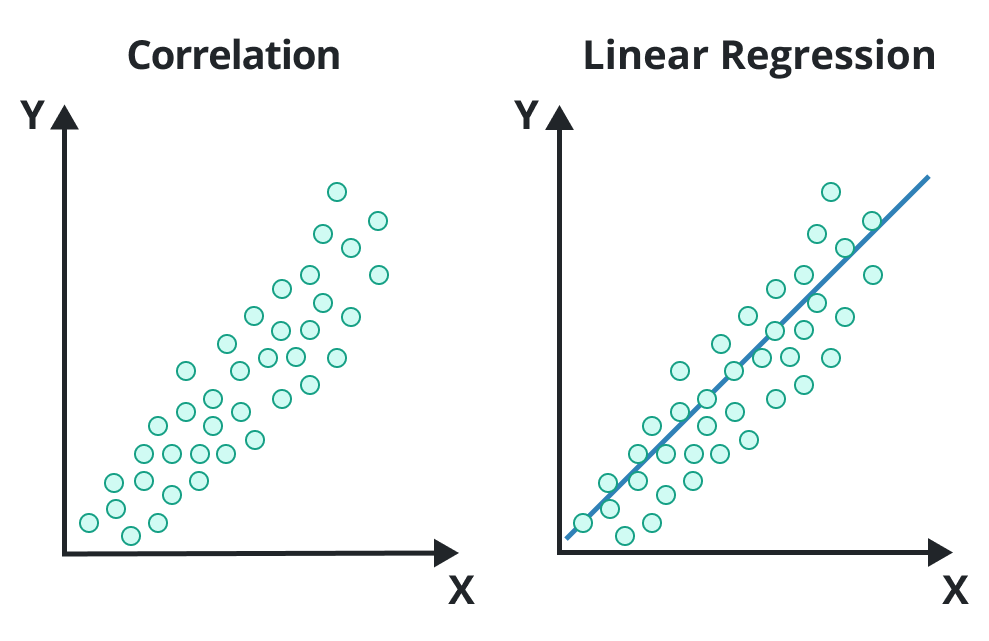

Для количественной оценки точности модели линейной регрессии часто используют **сумму квадратов отклонений (Sum of Squared Errors, SSE)** — статистическую меру, которая отражает суммарную величину квадратов разностей между фактическими значениями и предсказанными моделью результатами. SSE позволяет измерить, насколько хорошо модель описывает данные: чем меньше значение SSE, тем точнее модель.

Рассчитывается SSE по следующей формуле:

$$SSE=\sum\limits_{i=1}^N(y_i-\hat{y_i})^2,$$
где:
*   $y_i$ — каждое наблюдаемое значение,
*   $\hat{y_i}$ — каждое предсказанное значение,
*   $N$ - количество наблюдений.

**Метод наименьших квадратов (МНК)** представляет собой математический подход для нахождения оптимальных параметров функции $y=ax+b$, где $a$ — свободный член (сдвиг), а $b$ — коэффициент наклона (угловой коэффициент). Суть метода заключается в минимизации суммы квадратов отклонений наблюдаемых значений от предсказанных моделью.

Оценки параметров $b$ и $a$ находят по формулам:

$$b=\frac{\overline{x\cdot y}-\bar{x}\cdot\bar{y}}{\overline{x^2}-\bar{x}^2}=\frac{cov(x,y)}{\sigma_x^2},$$
$$a=\bar{y}-b\cdot\bar{x}.$$
Здесь $cov(x,y)$ - ковариация, $\sigma^2$ - дисперсия.

### Пример

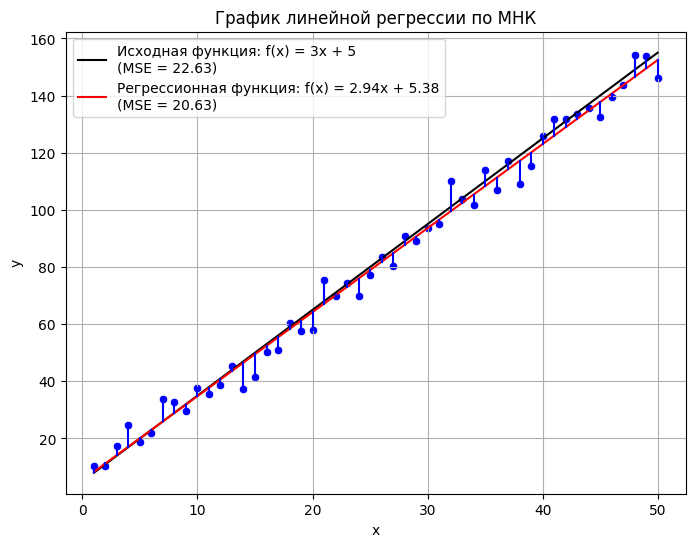

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Генерируем точки
np.random.seed(42)
x = np.linspace(1, 50, 50)
noise = np.random.normal(0, 5, size=x.shape)
a_base, b_base = 3, 5
y_base = a_base * x + b_base
y_true = y_base + noise

# Вычисляем параметры уравнения регрессии по методу наименьших квадратов
a = (np.mean(x * y_true) - np.mean(x) * np.mean(y_true)) / (np.mean(x**2) - np.mean(x)**2)
b = np.mean(y_true) - a * np.mean(x)
y_pred = a * x + b

# Функция для вычисления MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(x, y_base, label=f'Исходная функция: f(x) = {a_base}x + {b_base}\n(MSE = {np.round(mse(y_true, y_base), 2)})', color='black')
plt.plot(x, y_pred, label=f'Регрессионная функция: f(x) = {np.round(a, 2)}x + {np.round(b, 2)}\n(MSE = {np.round(mse(y_true, y_pred), 2)})', color='red')
sns.scatterplot(x=x, y=y_true, color='blue')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_true[i], y_pred[i]], color='blue')
plt.title('График линейной регрессии по МНК')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Классификация

**Классификация** — это задача отнесения объекта к одному из заранее определённых классов на основании его формализованных признаков. В отличие от регрессии, где предсказываются непрерывные значения, классификация фокусируется на предсказании дискретных меток, таких как «да» или «нет», «красный» или «синий», «болен» или «здоров».

## Метрики классификации

**Точность (accuracy)** - доля правильно классифицированных объектов из общего числа объектов в наборе данных (тестовом). Однако, точность может быть обманчива в случае несбалансированных классов, поскольку она не учитывает соотношения ложных срабатываний.

Вычисляется по формуле:

$$accuracy=\frac{TP+TN}{TP+TN+FP+FN}.$$

**Точность (precision)** - доля объектов, названных моделью положительными, которые действительно являются положительными. Эта метрика важна, когда необходимо минимизировать количество ложных положительных результатов.

Вычисляется по формуле:

$$precision=\frac{TP}{TP+FP}.$$

**Полнота (recall)** - доля объектов положительного класса, которые были правильно выявлены моделью. Эта метрика важна, когда ошибка нераспознания положительного класса имеет большие последствия.

Вычисляется по формуле:

$$recall=\frac{TP}{TP+FN}.$$

Где:
*   **TP** — true positive, истинный положительный, то есть ответ, который классифицирован как 1 и на самом деле ответ должен быть 1.

*   **TN** — true negative, истинный отрицательный, то есть ответ, который классифицирован как 0 и на самом деле ответ должен быть 0.

*   **FP** — false positive, ложный положительный, то есть ответ, который классифицирован как 1, но на самом деле ответ должен быть 0.

*   **FN** — false negative, ложный отрицательный, то есть ответ, который классифицирован как 0, но на самом деле ответ должен быть 1.

Эти метрики являются фундаментальными для оценки качества и производительности моделей бинарной классификации.

**F1-мера (F1-score)** - среднее гармоническое точности и полноты, что позволяет объединить эти две метрики в одну. Эта метрика полезна, когда точность и полнота имеют одинаковую важность.

Вычисляется по формуле:

$$F_1=2\cdot\frac{precision \cdot recall}{precision+recall}.$$

**ROC-кривая (Receiver Operating Characteristic, «рабочая характеристика приёмника»)** — это график, который позволяет оценить качество бинарной классификации. Он помогает визуализировать, насколько хорошо модель машинного обучения может различать два класса.

ROC-кривая строится путём построения графика зависимости **истинно положительного результата (TPR)** от **ложноположительного результата (FPR)** при различных настройках порога:

*   TPR (также известен как Recall) измеряет долю реальных положительных случаев, которые были правильно идентифицированы моделью:

$$TPR=\frac{TP}{TP+FN}.$$

*   FPR определяет долю реальных отрицательных экземпляров, которые модель неверно определила как положительные:

$$TPR=\frac{FP}{FP+TN}.$$

Форма и положение ROC-кривой многое говорят об эффективности модели:

*   Случайный классификатор: Диагональная линия от (0,0) до (1,1) представляет модель, не обладающую дискриминационной способностью - это эквивалентно случайному угадыванию.

*   Хороший классификатор: Кривая, склоняющаяся к левому верхнему углу, указывает на хороший классификатор. Чем ближе кривая к левому верхнему углу, тем лучше его производительность, поскольку он достигает высокого TPR при сохранении низкого FPR.

*   Идеальный классификатор: Идеальный классификатор имеет кривую, которая идет от (0,0) прямо вверх к (0,1), а затем поперек к (1,1), достигая 100% TPR при 0% FPR.

Обычной метрикой, получаемой из ROC-кривой, является **площадь под кривой (AUC)** - вероятность того, что классификатор оценит случайно выбранный положительный экземпляр выше, чем случайно выбранный отрицательный.
Вычисляется ROC-AUC через интеграл:

$$AUC=∫\limits_0^1TPR_t dFPR_t,$$
где t - порог,

но для удобства для вычисления используют метод трапеции:

$$AUC = \sum\limits_{t=1}^p\left[\frac{1}{2}\times(FPR_{t+1}-FPR_t)\times(TPR_{t+1}+TPR_t)\right],$$
где p - число пороговых значений.

Значение AUC, равное 1, означает идеальную модель, а значение AUC, равное 0.5, соответствует случайной модели.

В библиотеке scikit-learn также есть готовые функции для оценки качества моделей классификации.

## Логистическая регрессия методом максимального правдоподобия

**Логистическая регрессия или логит-модель** — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. Эта регрессия выдаёт ответ в виде вероятности бинарного события (1 или 0).


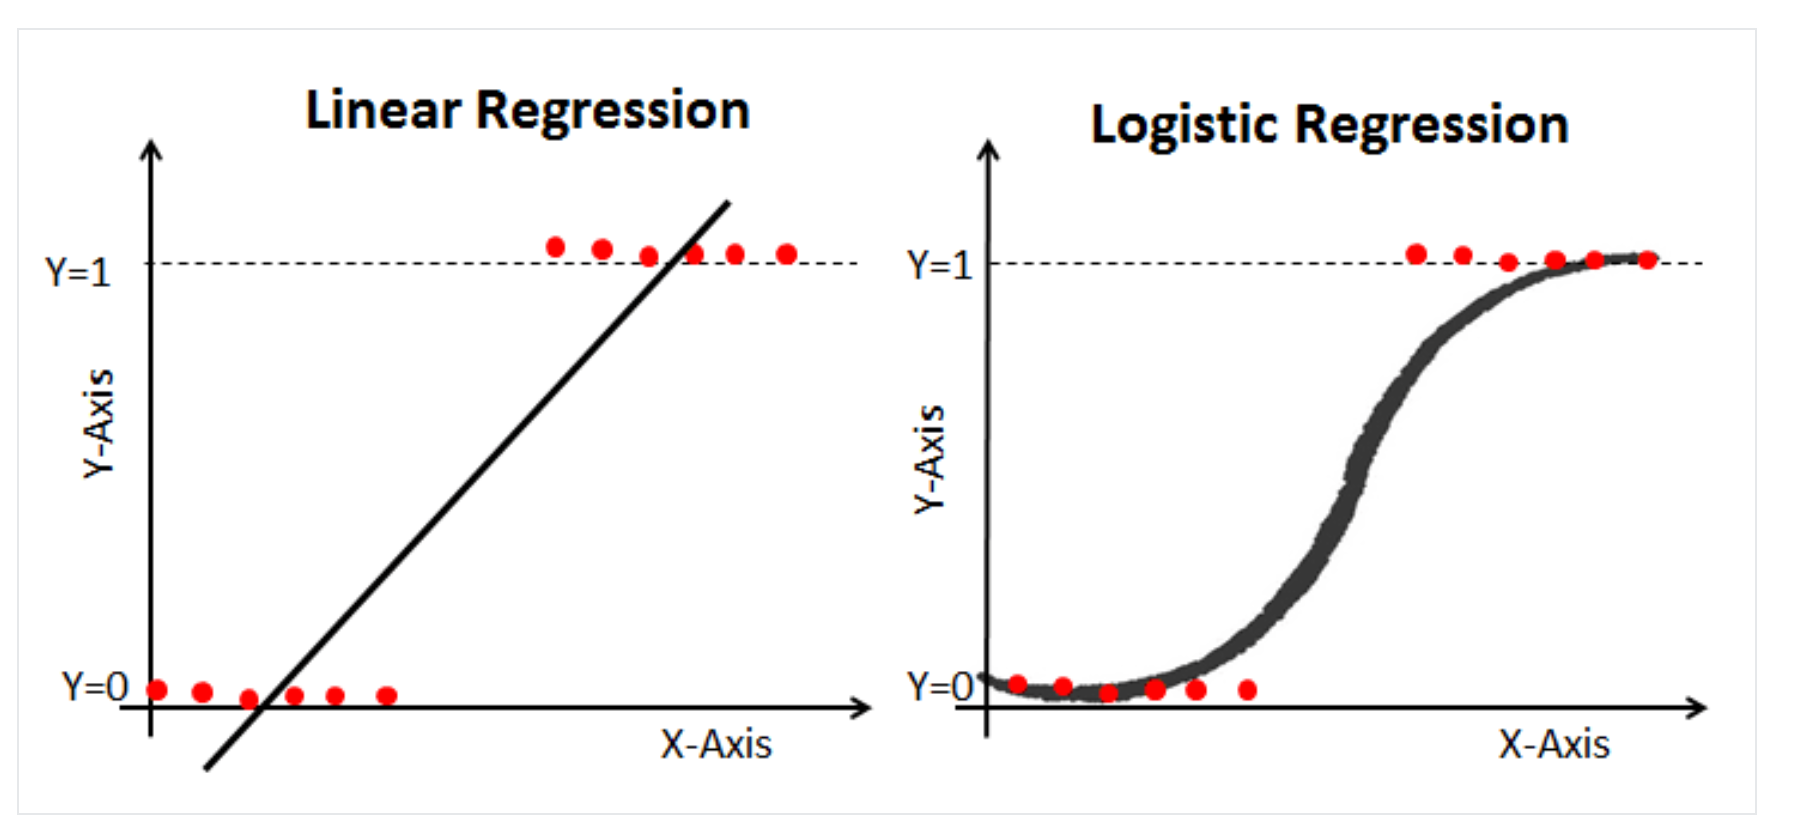

Модель логистической регрессии строится на основе линейной функции от признаков с добавлением смещения, обычно представляемого как свободный член. Для удобства вектор признаков дополняется фиктивным признаком, равным единице, и расширяется до вида $x'=(1,x_1,\ldots,x_n)$. Тогда линейная комбинация параметров и признаков записывается как

$$z=w^Tx'=w_0+\sum\limits_{j=1}^mw_jx_j,$$
где $w=(w_0,w_1,...,w_m)$ - вектор параметров модели, включающий смещение $w_0$.

Поскольку задача стоит в прогнозировании вероятности, полученное линейное выражение $z$ преобразуется с помощью **сигмоидальной функции** (логистической функции):

$$\hat{y}=\sigma(z)=\frac{1}{1+e^{-z}}.$$

Функция $\sigma(z)$ ограничивает значение выхода в интервал от 0 до 1, что позволяет интерпретировать $y$ как вероятность принадлежности объекта к классу 1.

Для обучения модели необходимо подобрать параметры $w$, обеспечивающие наилучшее соответствие предсказанных вероятностей истинным меткам обучающих объектов. Такая задача решается с помощью максимизации **функции правдоподобия**, которая при данном предположении и независимости выборки сводится к минимизации отрицательного логарифма правдоподобия. В практике машинного обучения чаще используют среднее значение потерь по выборке:

$$E(w)=-\frac{1}{N}\sum\limits_{i=1}^N[y_i\log\hat{y_i}+(1-y_i)\log(1-\hat{y_i})]$$
где:
*   $y_i$ — каждое наблюдаемое значение,
*   $\hat{y_i}$ — каждое предсказанное значение,
*   $N$ - количество наблюдений.

Для решения задачи оптимизации используется **градиентный спуск** — метод, который итеративно корректирует параметры модели, двигаясь в направлении уменьшения функции потерь. Градиент функции $E(w)$ по параметру $w_i$ вычисляется как

$$\frac{\partial{E}}{\partial{w_j}}=\frac{1}{N}\sum\limits_{i=1}^N(\hat{y_i}-y_i)x'_{ij},$$

где $x'_{ij}$ — значение $j$-го признака для объекта $i$. Для смещения $x'_{i0}=1$.

Обновление параметров происходит по правилу

$$w_j:=w_j-\eta\frac{\partial{E}}{\partial{w_j}},$$
где $\eta$ — положительный гиперпараметр, задающий скорость обучения. Этот процесс повторяется до тех пор, пока функция потерь не перестанет существенно уменьшаться, что будет означать достижение сходимости алгоритма.

### Пример

Импорт библиотек

In [113]:
import numpy as np
import math
import random
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP
from sklearn.model_selection import train_test_split

Генерация данных

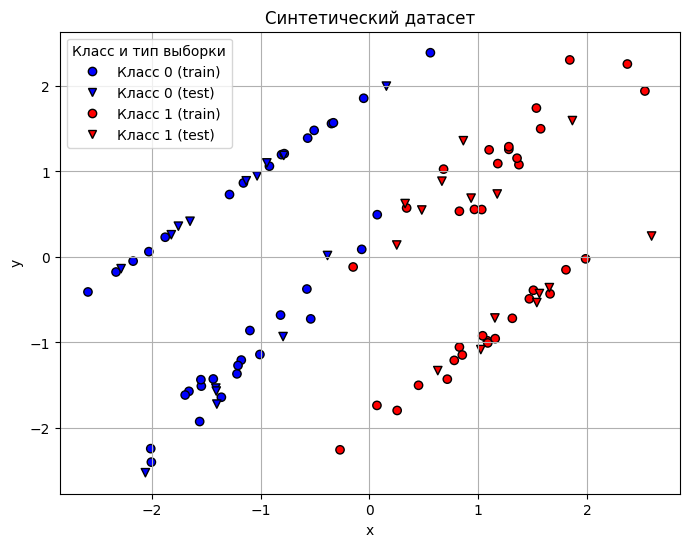

In [114]:
# Сгенерируем простой датасет для теста
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Визуализируем датасет
plt.figure(figsize=(8, 6))
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', marker='o', edgecolor='k', label='Обучающая выборка')
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='v', edgecolor='k', label='Тестовая выборка')
plt.title('Синтетический датасет')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Корректные метки классов:
handles = [
    plt.Line2D([], [], marker='o', color='blue', markeredgecolor='k', linestyle='', label='Класс 0 (train)'),
    plt.Line2D([], [], marker='v', color='blue', markeredgecolor='k', linestyle='', label='Класс 0 (test)'),
    plt.Line2D([], [], marker='o', color='red', markeredgecolor='k', linestyle='', label='Класс 1 (train)'),
    plt.Line2D([], [], marker='v', color='red', markeredgecolor='k', linestyle='', label='Класс 1 (test)')
]
plt.legend(handles=handles, title="Класс и тип выборки")
plt.show()

Обучение

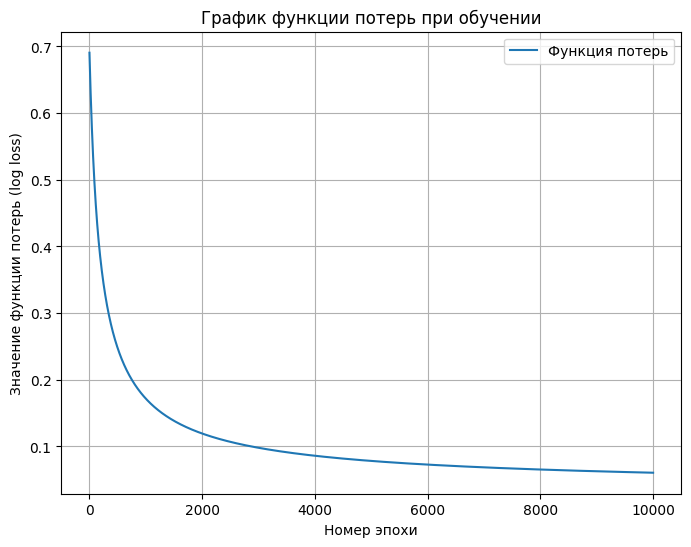

In [117]:
class LogisticRegression:
    """
    Пользовательский класс логистической регрессии.
    Параметры:
        epochs - количество эпох обучения,
        learning_rate - скорость обучения.

    Не работает с предобученными весами.
    """

    def __init__(self, epochs, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = None

    def fit(self, X_train, y_train):
        N, m = X_train.shape
        # Инициализация трёх весов случайными числами в диапазоне [-1, 1]
        self.weights = np.random.uniform(-0.01, 0.01, size=(m + 1))

        # Вводим фиктивный признак
        X_bias = np.hstack((np.ones((N, 1)), X_train))

        loss = []

        # Меняем веса заданное количество эпох
        for _ in range(self.epochs):
            # Перерасчет весов
            z = np.dot(X_bias, self.weights)
            y_prob = 1 / (1 + np.exp(-z))

            gradient = np.dot(X_bias.T, y_prob - y_train)

            self.weights -= self.learning_rate * gradient / N

            # Рассчет потерь
            y_prob_clip = np.clip(y_prob, 1e-15, 1 - 1e-15)
            log_loss = -np.mean(y_train * np.log(y_prob_clip) + (1 - y_train) * np.log(1 - y_prob_clip))

            ## Вывод процесса обучения
            # print(f"{iter}: LogLoss = {log_loss:.2f}")

            loss.append(log_loss)
        return loss

    def predict_proba(self, X_test):
        N = X_test.shape[0]
        # Вводим фиктивный признак
        X_bias = np.hstack((np.ones((N, 1)), X_test))

        # Вычисляем предсказание через сигмоиду
        z = np.dot(X_bias, self.weights)
        y_prob = 1 / (1 + np.exp(-z))
        return y_prob

    def predict(self, X_test):
        y_prob = self.predict_proba(X_test)
        y_pred = (y_prob >= 0.5).astype(int)
        return y_pred

# Задаем параметры обучения
EPOCHS = 10000
LEARNING_RATE=0.01

# Инициализируем и обучаем модель
model = LogisticRegression(epochs=EPOCHS, learning_rate=LEARNING_RATE)
loss = model.fit(X_train, y_train)

# Визуализируем процесс обучения
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS + 1), loss, label='Функция потерь')
plt.title('График функции потерь при обучении')
plt.xlabel('Номер эпохи')
plt.ylabel('Значение функции потерь (log loss)')
plt.legend()
plt.grid(True)
plt.show()

Оценка

Accuracy = 1.00
Precision = 1.00
Recall = 1.00
F1-score = 1.00


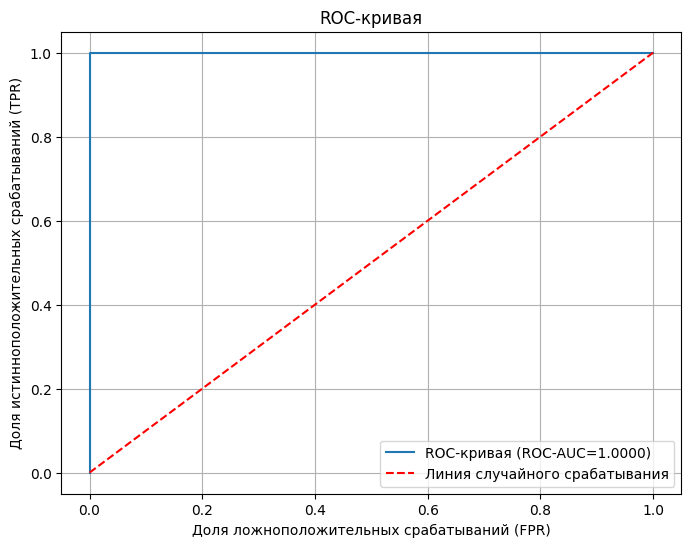

In [116]:
# Функция для вычисления показателей матрицы ошибок
def confusion_counts(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

# --== Accuracy, Precision, Recall, F1-score ==--
y_pred = model.predict(X_test)

tp, tn, fp, fn = confusion_counts(y_test, y_pred)

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print(f"Accuracy = {accuracy:.2f}")
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")
print(f"F1-score = {f1_score:.2f}")

# --== ROC AUC ==--
y_prob = model.predict_proba(X_test)

tpr = []
fpr = []

for threshold in np.unique(np.append(y_prob, [0, 1]))[::-1]:
    y_thresholded = np.array([1 if prob > threshold else 0 for prob in y_prob])

    tp, tn, fp, fn = confusion_counts(y_test, y_thresholded)

    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))

auc = 0
for i in range(len(fpr) - 1):
    auc += ((fpr[i + 1] - fpr[i]) * (tpr[i + 1] + tpr[i])) / 2

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (ROC-AUC={auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Линия случайного срабатывания')
plt.xlabel('Доля ложноположительных срабатываний (FPR)')
plt.ylabel('Доля истинноположительных срабатываний (TPR)')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()